# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
! pip install fabric

In [1]:
from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt

### Personal Details

Below are the details needed to authenticate into the server and crete a client connection

In [4]:
host="ppolak5.ams.stonybrook.edu."
server_user= 'TEMP'
server_password='TEMP'
db_user='TEMP'
db_pass='TEMP'

In [6]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

In [5]:
exchange="N" #nasdaq 
symbol='AAPL'
start= "2020-01-01"
end="2020-01-30"


In [6]:
result=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)


Trade Query for N AAPL 2020-01-01 2020-01-30


INFO:paramiko.transport:Authentication (password) successful!
/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [7]:
trades=pd.read_csv('data/AAPL_trades.csv')
trades=clean_trades(trades)
trades.to_csv('data/AAPL_trades.csv')
trades

,Time,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,date
2020-01-02 09:30:00.624116,2020-01-02 09:30:00.624116,N,AAPL,50,296.23,@ I,N,2020-01-02
2020-01-02 09:30:00.836409,2020-01-02 09:30:00.836409,N,AAPL,22,296.25,@ I,N,2020-01-02
2020-01-02 09:30:01.073828,2020-01-02 09:30:01.073828,N,AAPL,31,296.26,@ I,N,2020-01-02
2020-01-02 09:30:01.261512,2020-01-02 09:30:01.261512,N,AAPL,3,296.27,@ I,N,2020-01-02
2020-01-02 09:30:01.294279,2020-01-02 09:30:01.294279,N,AAPL,31,296.25,@ I,N,2020-01-02
...,...,...,...,...,...,...,...,...
2020-01-29 15:59:53.741022,2020-01-29 15:59:53.741022,N,AAPL,200,324.19,@,N,2020-01-29
2020-01-29 15:59:54.202375,2020-01-29 15:59:54.202375,N,AAPL,7,324.20,@F I,N,2020-01-29
2020-01-29 15:59:54.211587,2020-01-29 15:59:54.211587,N,AAPL,18,324.15,@F I,N,2020-01-29
2020-01-29 15:59:55.697308,2020-01-29 15:59:55.697308,N,AAPL,3,324.26,@ I,N,2020-01-29


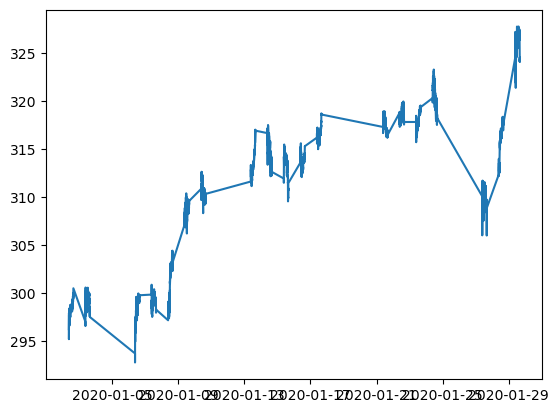

In [8]:
plt.plot(trades['Trade_Price'])

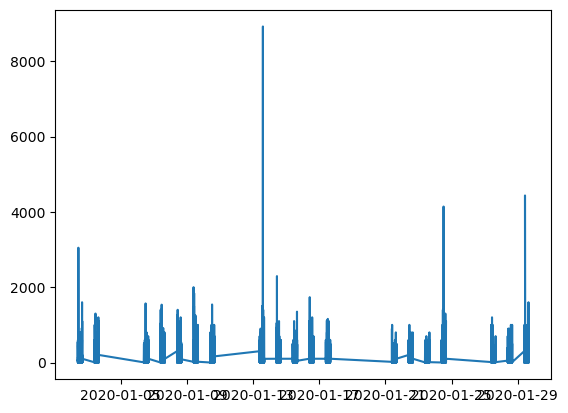

In [9]:
plt.plot(trades['Trade_Volume'])

### Example Quote Query

In [5]:
exchange="N"
symbol='AAPL'
start= "2020-01-15"
end="2020-01-30"


In [6]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

In [7]:
result=conn.client_get_quotes(exchange,symbol,start,end)

Quote Query for N AAPL 2020-01-15 2020-01-30


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


Load in first 20000 top of book quotes 

In [2]:
quotes=pd.read_csv("data/AAPL_quotes.csv",nrows=20000) 

# ts realignment based on participant ts and dropping invalid observations 
quotes=clean_quotes(quotes)

#quotes.to_csv('data/AAPL_quotes1.csv')

In [3]:
quotes

,SIP_Timestamp,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,Source_Of_Quote,Best_Bid_Exchange,Best_Bid_Price,Best_Bid_Size,Best_Offer_Exchange,Best_Offer_Price,Best_Offer_Size,LULD_NBBO_Indicator,Security_Status_Indicator,date
2020-01-15 09:30:00.953633,2020-01-15 09:30:00.954013,N,AAPL,311.94,1.0,326.18,1.0,R,356546,N,N,311.94,1.0,V,311.96,1.0,A,,2020-01-15
2020-01-15 09:30:01.004096,2020-01-15 09:30:01.004476,N,AAPL,310.85,1.0,326.18,1.0,R,357650,N,Q,311.92,2.0,Q,311.99,1.0,A,,2020-01-15
2020-01-15 09:30:01.076382,2020-01-15 09:30:01.076759,N,AAPL,310.85,1.0,311.96,1.0,R,358817,N,Q,311.89,3.0,N,311.96,1.0,A,,2020-01-15
2020-01-15 09:30:01.645062,2020-01-15 09:30:01.645440,N,AAPL,310.85,1.0,311.95,4.0,R,363970,N,Q,311.90,1.0,N,311.95,4.0,A,,2020-01-15
2020-01-15 09:30:01.677976,2020-01-15 09:30:01.678357,N,AAPL,310.85,1.0,311.95,3.0,R,364328,N,P,311.86,2.0,N,311.95,3.0,A,,2020-01-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-15 11:01:47.855547,2020-01-15 11:01:47.855924,N,AAPL,314.32,2.0,314.37,3.0,R,9087382,N,Z,314.33,1.0,Z,314.36,2.0,A,,2020-01-15
2020-01-15 11:01:48.113491,2020-01-15 11:01:48.113869,N,AAPL,314.33,2.0,314.38,2.0,R,9088026,N,Z,314.34,2.0,Z,314.37,1.0,A,,2020-01-15
2020-01-15 11:01:48.181675,2020-01-15 11:01:48.182051,N,AAPL,314.34,4.0,314.40,2.0,R,9088226,N,Z,314.35,1.0,P,314.38,2.0,A,,2020-01-15
2020-01-15 11:01:48.181817,2020-01-15 11:01:48.182193,N,AAPL,314.35,2.0,314.39,2.0,R,9088236,N,N,314.35,2.0,Z,314.39,3.0,A,,2020-01-15


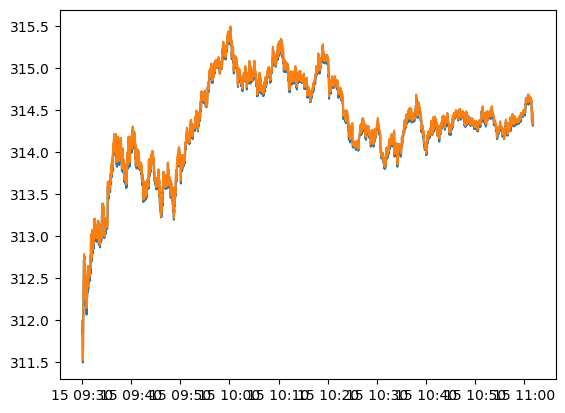

In [4]:
plt.plot(quotes['Best_Bid_Price'],label='Bid')
plt.plot(quotes['Best_Offer_Price'],label='Offer' )

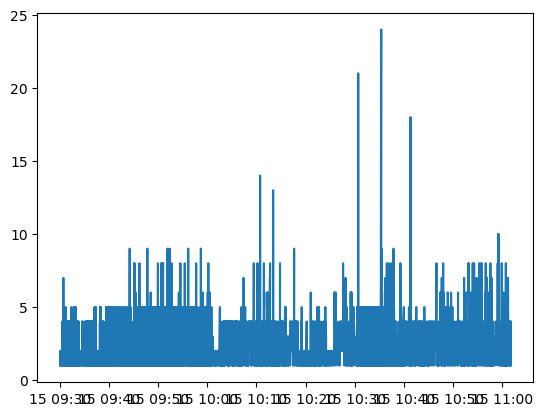

In [5]:
plt.plot(quotes['Bid_Size'],label='Bid Size')
